<a href="https://colab.research.google.com/github/cdpaez34/Proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import random

# Define data for the DataFrame
num_students = 100
last_names = ['Gonzalez', 'Rodriguez', 'Fernandez', 'Perez', 'Lopez', 'Garcia', 'Sanchez', 'Martinez', 'Diaz', 'Moreno']  # Add more last names as needed
first_names = ['Maria', 'Jose', 'Juan', 'Ana', 'Luis', 'Laura', 'Sofia', 'Pedro', 'Pablo', 'Lucas']  # Add more first names as needed
dni_numbers = [random.randint(10000000, 50000000) for _ in range(num_students)]
subjects = ['Matematica', 'Lengua', 'Historia', 'Geografia', 'Ciencias Naturales', 'Ingles', 'Educacion Fisica', 'Arte']  # Add more subjects as needed

# Create the DataFrame
data = {
    'Apellido': [random.choice(last_names) for _ in range(num_students)],
    'Nombre': [random.choice(first_names) for _ in range(num_students)],
    'Nro_DNI': dni_numbers,
    'Materia Escolar': [random.choice(subjects) for _ in range(num_students)],
    'Nota 1er Trimestre': np.random.randint(1, 11, size=num_students),  # Grades between 1 and 10
    'Nota 2do Trimestre': np.random.randint(1, 11, size=num_students),
    'Nota 3er Trimestre': np.random.randint(1, 11, size=num_students),
    'Faltas a Clases': np.random.randint(0, 30, size=num_students)  # Absences between 0 and 30
}
df = pd.DataFrame(data)

# Display the DataFrame
df.head()  # Shows the first 5 rows

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,Garcia,Luis,20605394,Matematica,1,9,5,12
1,Rodriguez,Maria,12424065,Geografia,8,1,5,12
2,Gonzalez,Maria,23698723,Lengua,8,6,4,29
3,Perez,Laura,40515114,Arte,6,8,8,14
4,Moreno,Laura,16609429,Educacion Fisica,1,2,3,13


<ipython-input-3-b4b4bdb9ccae>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(average_grades.index, rotation=45, ha='right')  # Rotate x-axis labels


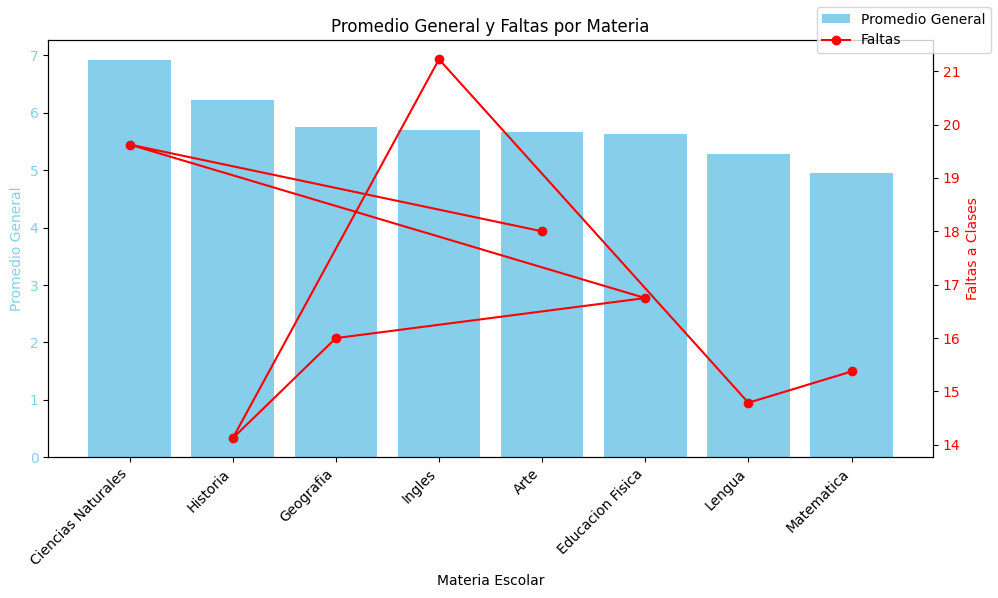

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average grade for each subject
average_grades = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate average absences for each subject
average_absences = df.groupby('Materia Escolar')['Faltas a Clases'].mean()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for average grades
ax1.bar(average_grades.index, average_grades.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(average_grades.index, rotation=45, ha='right')  # Rotate x-axis labels

# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(average_absences.index, average_absences.values, color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas a Clases', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends and title
plt.title('Promedio General y Faltas por Materia')
fig.legend(loc='upper right')

# Show the chart
plt.tight_layout()
plt.show()